In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the dataset
premier_league_data = pd.read_csv('premier-league-matches.csv')


# Group by home team and sum the goals
home_goals = premier_league_data.groupby('Home').agg(
    total_goals_scored_home=pd.NamedAgg(column='HomeGoals', aggfunc='sum'),
    total_goals_conceded_home=pd.NamedAgg(column='AwayGoals', aggfunc='sum')
)

# Group by away team and sum the goals
away_goals = premier_league_data.groupby('Away').agg(
    total_goals_scored_away=pd.NamedAgg(column='AwayGoals', aggfunc='sum'),
    total_goals_conceded_away=pd.NamedAgg(column='HomeGoals', aggfunc='sum')
)

# Merge the two dataframes on the team name
team_goals = pd.merge(home_goals, away_goals, left_index=True, right_index=True)

# Calculate total goals scored and conceded for each team
team_goals['total_goals_scored'] = team_goals['total_goals_scored_home'] + team_goals['total_goals_scored_away']
team_goals['total_goals_conceded'] = team_goals['total_goals_conceded_home'] + team_goals['total_goals_conceded_away']

team_goals




,total_goals_scored_home,total_goals_conceded_home,total_goals_scored_away,total_goals_conceded_away,total_goals_scored,total_goals_conceded
Home,,,,,,
Arsenal,1207,514,898,677,2105,1191
Aston Villa,717,598,599,801,1316,1399
Barnsley,25,35,12,47,37,82
Birmingham City,162,140,111,220,273,360
Blackburn,545,381,382,526,927,907
Blackpool,30,37,25,41,55,78
Bolton,319,313,256,432,575,745
Bournemouth,156,176,122,225,278,401
Bradford City,46,58,22,80,68,138


In [96]:
premier_league_data = pd.read_csv('premier-league-matches.csv')


home_wins = premier_league_data[premier_league_data['FTR'] == 'H'].groupby('Home').size()


away_wins = premier_league_data[premier_league_data['FTR'] == 'A'].groupby('Away').size()


total_home_matches = premier_league_data.groupby('Home').size()


total_away_matches = premier_league_data.groupby('Away').size()


home_win_rate = home_wins / total_home_matches
away_win_rate = away_wins / total_away_matches


win_rates = pd.DataFrame({
    'Home Win Rate': home_win_rate,
    'Away Win Rate': away_win_rate
}).reset_index()

win_rates.columns = ['Team', 'Home Win Rate', 'Away Win Rate']
display(win_rates)

plt.savefig('../images/homeandawayratio.png', bbox_inches='tight')


,Team,Home Win Rate,Away Win Rate
0,Arsenal,0.642017,0.442017
1,Aston Villa,0.408922,0.282528
2,Barnsley,0.368421,0.157895
3,Birmingham City,0.375940,0.172932
4,Blackburn,0.485632,0.267241
5,Blackpool,0.263158,0.263158
6,Bolton,0.376518,0.226721
7,Bournemouth,0.350877,0.236842
8,Bradford City,0.263158,0.105263
9,Brentford,0.447368,0.289474


FileNotFoundError: [Errno 2] No such file or directory: '../images/homeandawayratio.png'

<Figure size 640x480 with 0 Axes>

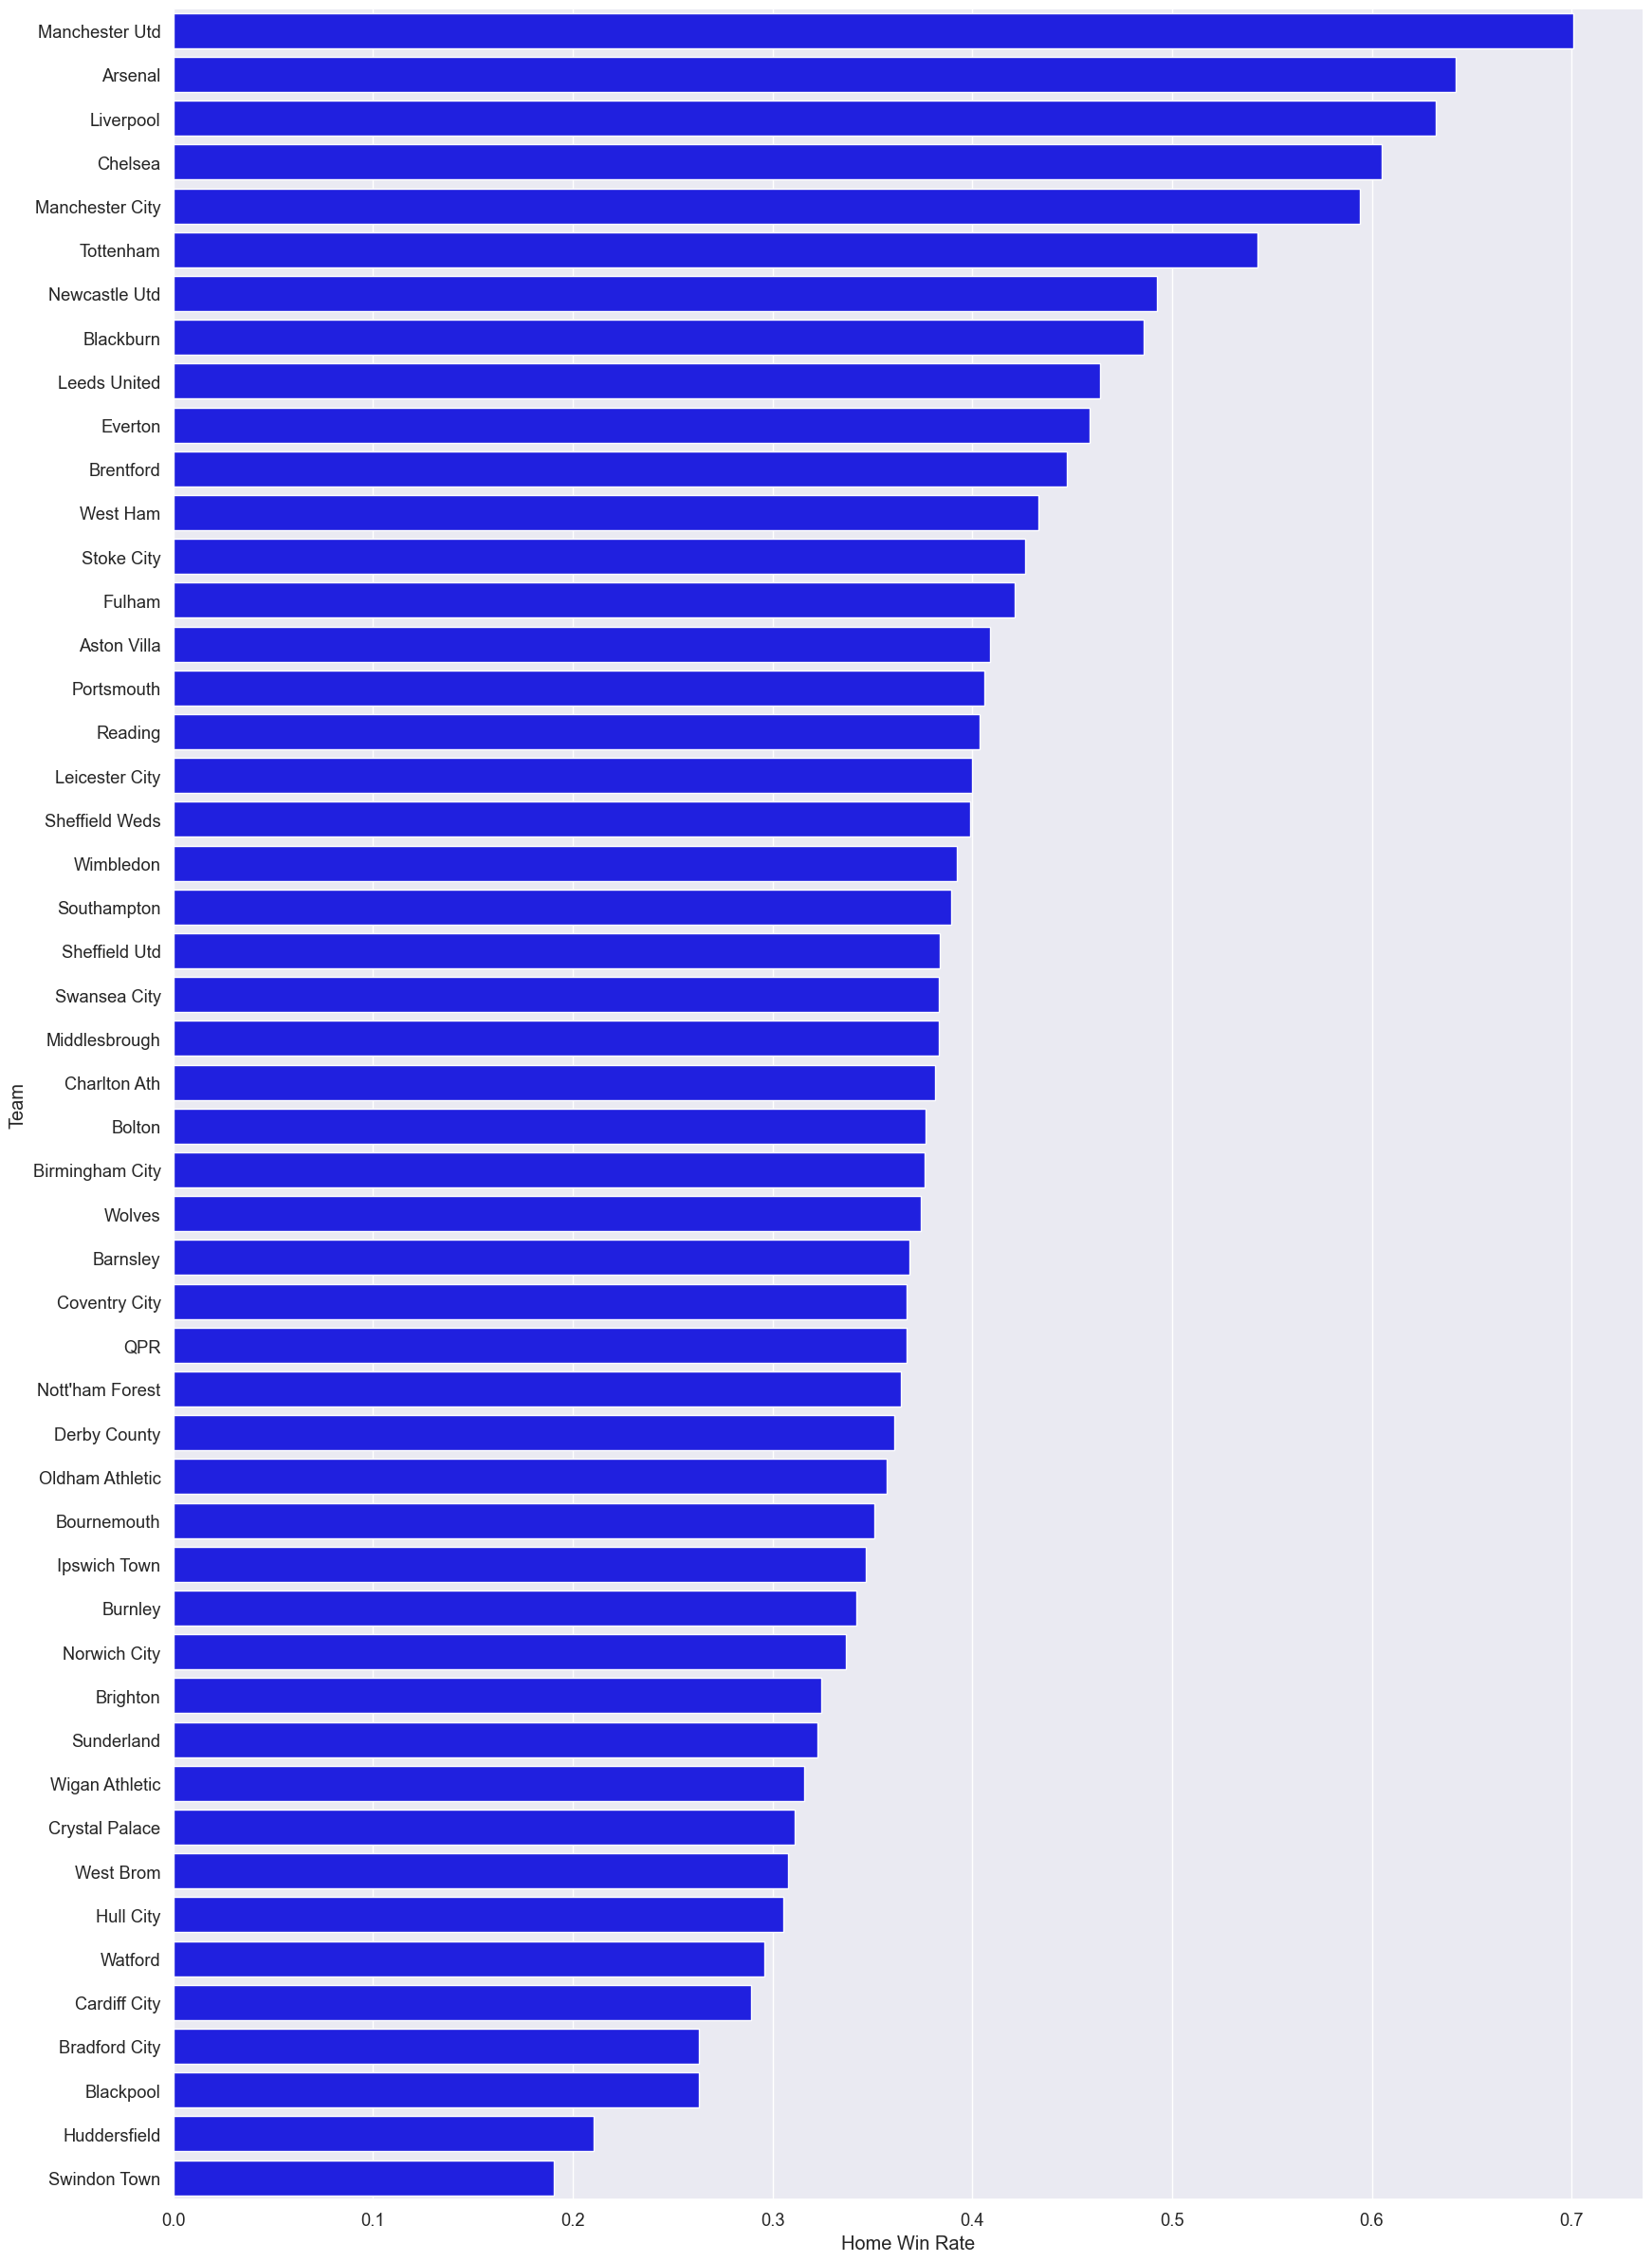

In [87]:
fig, ax = plt.subplots(figsize=(20,30))
sns.barplot(data=win_rates, y='Team',x='Home Win Rate', 
            order=win_rates.sort_values(by="Home Win Rate", ascending=False)["Team"],
            color='blue');

plt.show()



In [78]:
# Load the dataset
data = pd.read_csv('dataset - 2020-09-24.csv')

# Filter players with fewer than 10 appearances
impactful_players = data[data['Appearances'] < 10]

# Sort these players based on goals
top_substitutes_goals = impactful_players.sort_values(by='Goals', ascending=False).head(10)

# Sort these players based on assists
top_substitutes_assists = impactful_players.sort_values(by='Assists', ascending=False).head(10)

# Display the top players based on goals
print("Top Substitutes Based on Goals:")
display(top_substitutes_goals[['Name', 'Club', 'Goals']])

# Display the top players based on assists
print("\nTop Substitutes Based on Assists:")
display(top_substitutes_assists[['Name', 'Club', 'Assists']])


Top Substitutes Based on Goals:


,Name,Club,Goals
245,Mateusz Klich,Leeds-United,2
398,Matthew Longstaff,Newcastle-United,2
191,James Rodríguez,Everton,1
516,Matheus Pereira,West-Bromwich-Albion,1
401,Henri Saivet,Newcastle-United,1
373,Donny van de Beek,Manchester-United,1
307,Curtis Jones,Liverpool,1
247,Jack Harrison,Leeds-United,1
101,Jimmy Dunne,Burnley,1
12,Gabriel Magalhães,Arsenal,1



Top Substitutes Based on Assists:


,Name,Club,Assists
266,Luke Thomas,Leicester-City,1
245,Mateusz Klich,Leeds-United,1
191,James Rodríguez,Everton,1
213,Kenny Tete,Fulham,1
516,Matheus Pereira,West-Bromwich-Albion,1
244,Kalvin Phillips,Leeds-United,1
267,Timothy Castagne,Leicester-City,1
298,Nathaniel Phillips,Liverpool,0
410,Simon Moore,Sheffield-United,0
381,Daniel Langley,Newcastle-United,0


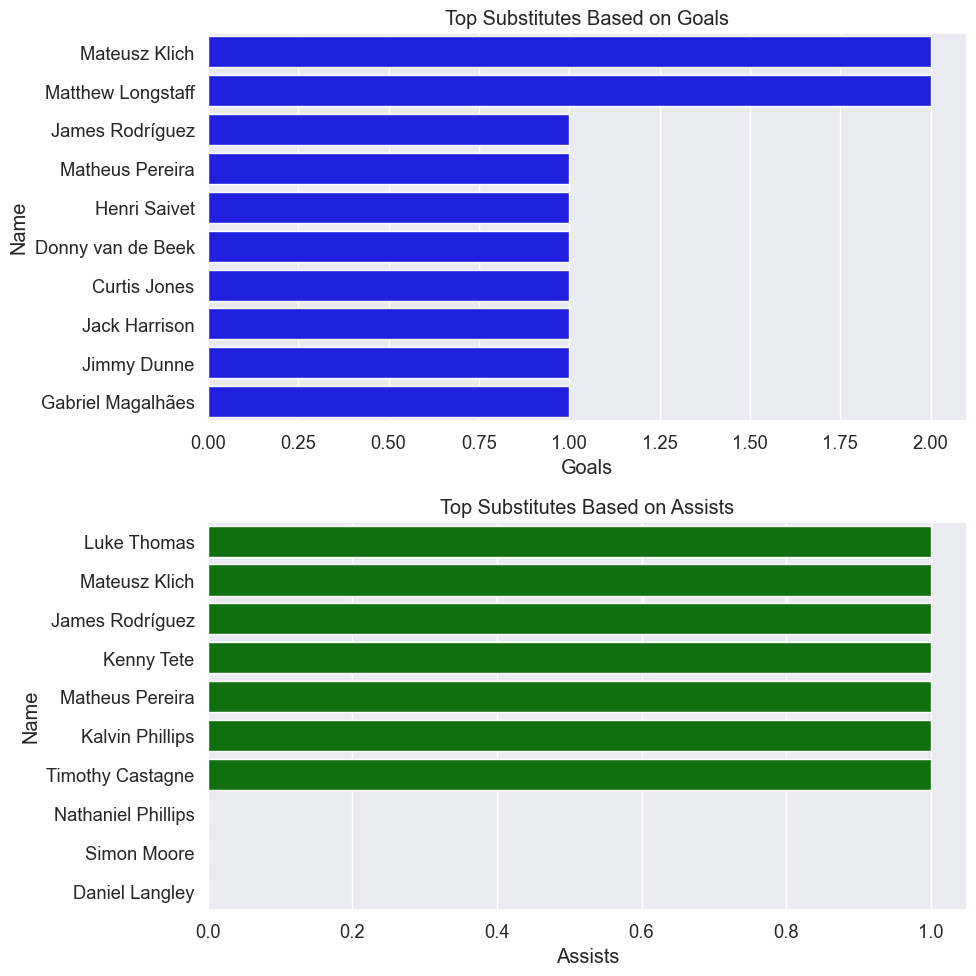

In [77]:
data = pd.read_csv('dataset - 2020-09-24.csv')


impactful_players = data[data['Appearances'] < 10]


top_substitutes_goals = impactful_players.sort_values(by='Goals', ascending=False).head(10)


top_substitutes_assists = impactful_players.sort_values(by='Assists', ascending=False).head(10)


fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.barplot(data=top_substitutes_goals, y='Name',x='Goals', color='blue',  ax=ax[0])
ax[0].set_title('Top Substitutes Based on Goals')
sns.barplot(data=top_substitutes_assists,y='Name', x='Assists', color='green',  ax=ax[1])
ax[1].set_title('Top Substitutes Based on Assists')
plt.tight_layout()
plt.savefig("../îmages/figure1.png")
plt.show()


In [46]:
data = pd.read_csv('dataset - 2020-09-24.csv')


top_goal_scorers = data.sort_values(by='Goals', ascending=False).head(5)


display(top_goal_scorers[['Name', 'Club', 'Goals']])


               Name               Club  Goals
344   Sergio Agüero    Manchester-City    180
489      Harry Kane  Tottenham-Hotspur    144
281     Jamie Vardy     Leicester-City    105
313      Sadio Mané          Liverpool     86
140  Olivier Giroud            Chelsea     86


<Figure size 1200x600 with 0 Axes>

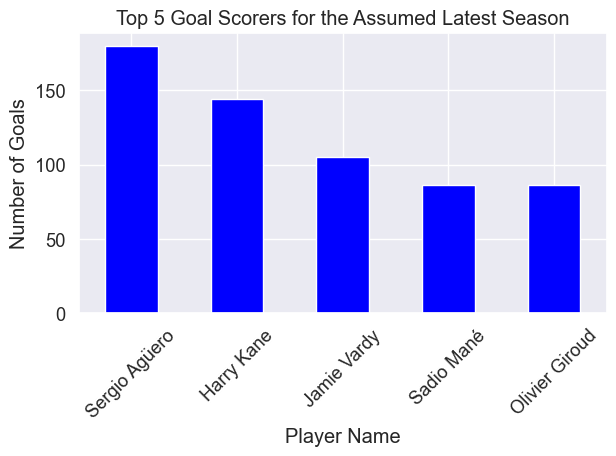

In [47]:
data = pd.read_csv('dataset - 2020-09-24.csv')

top_goal_scorers = data.sort_values(by='Goals', ascending=False).head(5)

plt.figure(figsize=(12, 6))
top_goal_scorers.plot(x='Name', y='Goals', kind='bar', color='blue', legend=False)
plt.title('Top 5 Goal Scorers for the Assumed Latest Season')
plt.ylabel('Number of Goals')
plt.xlabel('Player Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
# Load the dataset
data = pd.read_csv('dataset - 2020-09-24.csv')

# Group the dataset by 'Nationality' and sum the 'Appearances' for each nationality
appearances_per_country = data.groupby('Nationality')['Appearances'].sum()

# Sort the results in descending order
top_countries_by_appearances = appearances_per_country.sort_values(ascending=False)

# Display the number of appearances per country
display(top_countries_by_appearances)


Nationality
England                             16226
France                               2366
Spain                                2250
Brazil                               1729
Ireland                              1680
Scotland                             1613
Netherlands                          1103
Argentina                            1075
Wales                                 961
Belgium                               933
Germany                               703
Portugal                              690
Serbia                                677
Denmark                               513
Nigeria                               437
Egypt                                 426
Ghana                                 413
Senegal                               398
Cote D'Ivoire                         396
Iceland                               380
Northern Ireland                      368
Poland                                329
Switzerland                           321
Italy                 

In [ ]:
data = pd.read_csv('dataset - 2020-09-24.csv')

appearances_per_country = data.groupby('Nationality')['Appearances'].sum()

top_countries_by_appearances = appearances_per_country.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_countries_by_appearances.plot(kind='bar', color='purple', legend=False)
plt.title('Top 10 Countries by Number of Appearances')
plt.ylabel('Total Number of Appearances')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Load the datasets
players_data = pd.read_csv('dataset - 2020-09-24.csv')
matches_data = pd.read_csv('premier-league-matches.csv')


In [51]:
print(players_data.columns)



Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [52]:
# Calculate standard deviation for relevant columns in players_data
std_goals = players_data['Goals'].std().round(2)
std_assists = players_data['Assists'].std().raound(2)

# Calculate standard deviation for relevant columns in matches_data
std_home_goals = matches_data['HomeGoals'].std().round(2)
std_away_goals = matches_data['AwayGoals'].std().round(2)

print("Standard Deviation of Goals (Players Data):", std_goals)
print("Standard Deviation of Assists (Players Data):", std_assists)
print("Standard Deviation of Home Goals (Matches Data):", std_home_goals)
print("Standard Deviation of Away Goals (Matches Data):", std_away_goals)


Standard Deviation of Goals (Players Data): 16.810489536415307
Standard Deviation of Assists (Players Data): 9.761764773582739
Standard Deviation of Home Goals (Matches Data): 1.3064166408119195
Standard Deviation of Away Goals (Matches Data): 1.1339300397983445


In [53]:
# Melt the matches_data to have a single column for players
melted_matches = matches_data.melt(id_vars=['Date', 'Home', 'Away', 'HomeGoals', 'AwayGoals'], 
                                   value_vars=['HomePlayer1', 'HomePlayer2', 'HomePlayer3', 'HomePlayer4', 'HomePlayer5', 'HomePlayer6', 'HomePlayer7', 'HomePlayer8', 'HomePlayer9', 'HomePlayer10', 'HomePlayer11', 'AwayPlayer1', 'AwayPlayer2', 'AwayPlayer3', 'AwayPlayer4', 'AwayPlayer5', 'AwayPlayer6', 'AwayPlayer7', 'AwayPlayer8', 'AwayPlayer9', 'AwayPlayer10', 'AwayPlayer11'], 
                                   value_name='player_name').drop('variable', axis=1)

# Merge the datasets
merged_data = pd.merge(players_data, melted_matches, left_on='Name', right_on='player_name', how='inner')

# Display the first few rows of the merged data
merged_data.head()


KeyError: "The following 'value_vars' are not present in the DataFrame: ['AwayPlayer1', 'AwayPlayer10', 'AwayPlayer11', 'AwayPlayer2', 'AwayPlayer3', 'AwayPlayer4', 'AwayPlayer5', 'AwayPlayer6', 'AwayPlayer7', 'AwayPlayer8', 'AwayPlayer9', 'HomePlayer1', 'HomePlayer10', 'HomePlayer11', 'HomePlayer2', 'HomePlayer3', 'HomePlayer4', 'HomePlayer5', 'HomePlayer6', 'HomePlayer7', 'HomePlayer8', 'HomePlayer9']"

In [ ]:
print(matches_data.columns)


In [54]:
# Calculate average goals scored at home vs. away for each team
avg_home_goals = matches_data.groupby('Home')['HomeGoals'].mean()
avg_away_goals = matches_data.groupby('Away')['AwayGoals'].mean()

# Calculate win, loss, and draw rates for each team
win_rate = matches_data.groupby('Home').apply(lambda x: (x['FTR'] == 'H').mean())
loss_rate = matches_data.groupby('Home').apply(lambda x: (x['FTR'] == 'A').mean())
draw_rate = matches_data.groupby('Home').apply(lambda x: (x['FTR'] == 'D').mean())

avg_home_goals, avg_away_goals, win_rate, loss_rate, draw_rate


(Home
 Arsenal            2.028571
 Aston Villa        1.332714
 Barnsley           1.315789
 Birmingham City    1.218045
 Blackburn          1.566092
 Blackpool          1.578947
 Bolton             1.291498
 Bournemouth        1.368421
 Bradford City      1.210526
 Brentford          1.500000
 Brighton           1.236842
 Burnley            1.059211
 Cardiff City       1.078947
 Charlton Ath       1.309211
 Chelsea            1.917647
 Coventry City      1.237288
 Crystal Palace     1.081481
 Derby County       1.180451
 Everton            1.507563
 Fulham             1.351974
 Huddersfield       0.684211
 Hull City          1.126316
 Ipswich Town       1.237624
 Leeds United       1.477663
 Leicester City     1.409231
 Liverpool          2.020168
 Manchester City    2.034000
 Manchester Utd     2.100840
 Middlesbrough      1.369338
 Newcastle Utd      1.617537
 Norwich City       1.224490
 Nott'ham Forest    1.203390
 Oldham Athletic    1.595238
 Portsmouth         1.383459
 QPR    

In [55]:
# Analyze the distribution of goals and assists across players
goals_distribution = players_data['Goals'].describe()
assists_distribution = players_data['Assists'].describe()

# Identify the top players based on goals and assists
top_goal_scorers = players_data.nlargest(5, 'Goals')[['Name', 'Goals', 'Club']]
top_assist_providers = players_data.nlargest(5, 'Assists')[['Name', 'Assists', 'Club']]

goals_distribution, assists_distribution, top_goal_scorers, top_assist_providers


(count    571.000000
 mean       7.327496
 std       16.810490
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        6.000000
 max      180.000000
 Name: Goals, dtype: float64,
 count    571.000000
 mean       5.285464
 std        9.761765
 min        0.000000
 25%        0.000000
 50%        1.000000
 75%        6.000000
 max       84.000000
 Name: Assists, dtype: float64,
                Name  Goals               Club
 344   Sergio Agüero    180    Manchester-City
 489      Harry Kane    144  Tottenham-Hotspur
 281     Jamie Vardy    105     Leicester-City
 140  Olivier Giroud     86            Chelsea
 313      Sadio Mané     86          Liverpool,
                 Name  Assists               Club
 302     James Milner       84          Liverpool
 335  Kevin De Bruyne       67    Manchester-City
 13        Mesut Özil       54            Arsenal
 365        Juan Mata       52  Manchester-United
 198     Theo Walcott       51            Everton)

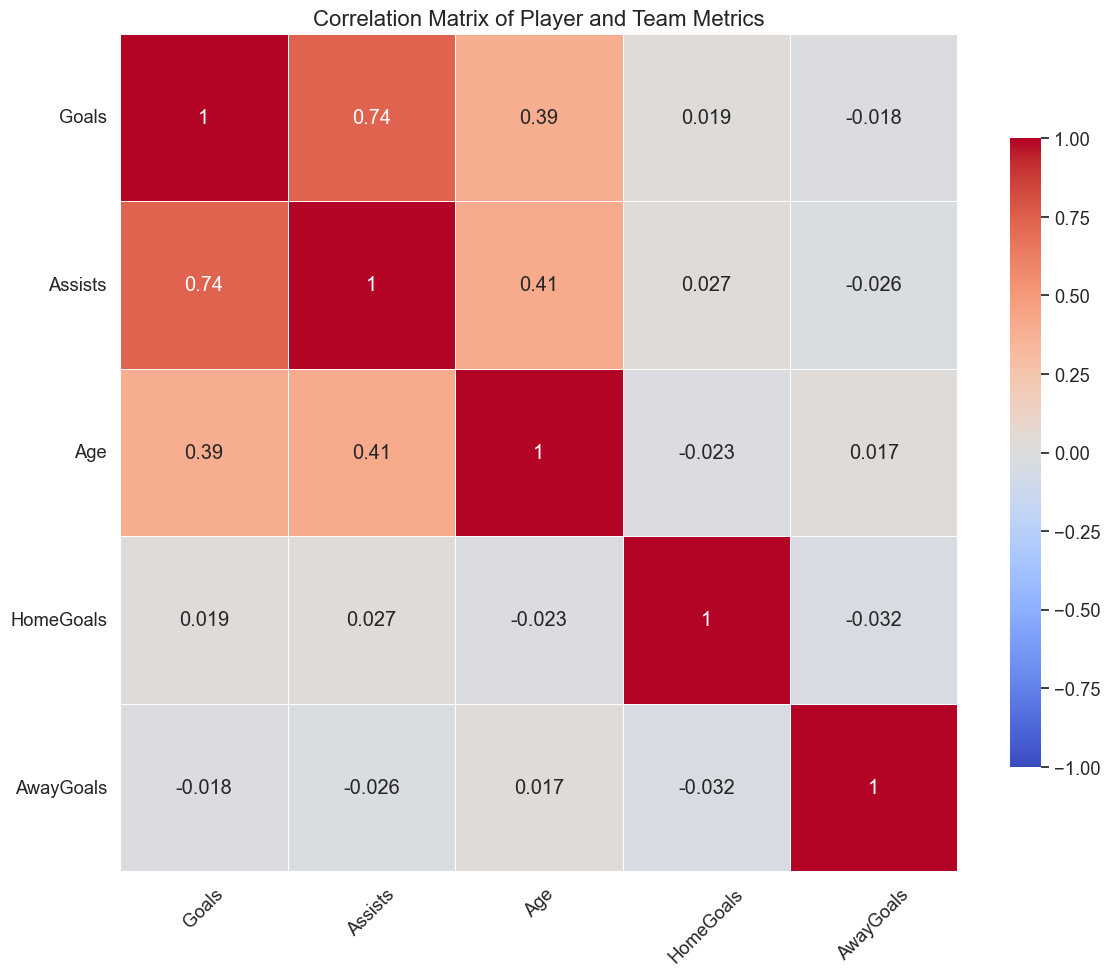

In [56]:
players_data = pd.read_csv('dataset - 2020-09-24.csv')
matches_data = pd.read_csv('premier-league-matches.csv')

# Merging the datasets based on the 'Club' and 'Home' columns
df_merged = pd.merge(players_data, matches_data, left_on='Club', right_on='Home', how='inner')

# Correlation matrix for selected metrics
correlation_matrix = df_merged[['Goals', 'Assists', 'Age', 'HomeGoals', 'AwayGoals']].corr()

# Visualization of the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Matrix of Player and Team Metrics', fontsize=16)
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the datasets
players_data = pd.read_csv('dataset - 2020-09-24.csv')
matches_data = pd.read_csv('premier-league-matches.csv')

# Calculate average player metrics for each team
avg_player_metrics = players_data.groupby('Club').agg({
    'Goals': 'mean',
    'Assists': 'mean',
    'Age': 'mean'
}).reset_index()

# Merge the datasets
df_merged = pd.merge(matches_data, avg_player_metrics, left_on='Home', right_on='Club', how='inner')

# Define features and target variable
X = df_merged[['Goals', 'Assists', 'Age']]
y = df_merged['HomeGoals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Mean Squared Error: 1.8680186653441062
         Coefficient
Goals      -0.213792
Assists     0.248305
Age        -0.375851
